In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib  import cm

from rw import scan_handler
from process import utils as ut

rc('text', usetex=False)
rc('font', family='serif', size=20)
rc('figure', figsize=(12,8))
rc('axes',linewidth=2)

%load_ext autoreload
%autoreload 2

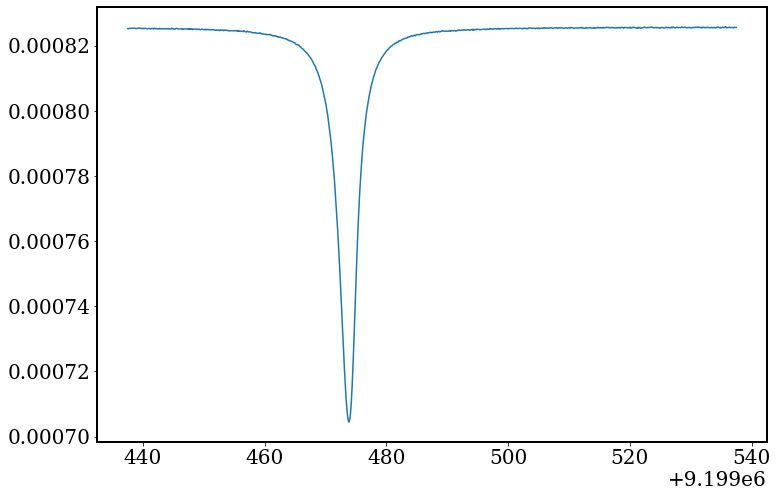

In [41]:
file_path = "/home/cmsdaq/Analysis/Data/RUN_5/processed_data/BAW_5_8.scan"    # path to the .scan file
reader = scan_handler.ScanReader(file_path) 

power = reader.get_parameters('input_power')
f0s = reader.get_parameters('f0')
Qs = reader.get_parameters('Q')
asim = reader.get_parameters('asim')

ii = np.argsort(Qs)

reso = reader.get_resonance(loc=ii[-2])
#reso = reader.get_resonance(freq=5.17414303)
skip = 0
power = reso['power']
power = (10**(power/10))  #mW
freq = reso['freq']

power=power[skip:]
freq = freq[skip:]
plt.plot(freq,power)



In [36]:
print(np.sort(f0s))

[ 1.28840286  1.4589987   1.52683523  1.6482061   1.86793435  1.91108699
  1.98034131  2.00252424  2.07586311  2.68771885  2.7808133   2.82086836
  3.00922379  3.06867646  3.09811235  3.10977186  3.13209922  3.15243155
  3.21772366  3.28285789  3.42422401  3.45901161  3.89376554  4.12840086
  4.59268131  4.60946338  4.8178647   4.99990489  5.0000318   5.08689922
  5.09009764  5.09399574  5.17414303  5.18151942  5.18959811  5.20035004
  5.24099047  5.35907009  5.36666943  5.47715134  5.50497977  5.54797485
  5.57398864  5.6219672   5.64502495  5.64620183  5.67238414  5.72393825
  5.76056663  5.96280251  6.04818861  6.45737049  6.73751285  6.91702582
  7.01244836  7.61545002  8.29690151  8.30893729  8.40263462  8.40937352
  8.49223923  8.4957002   8.49917316  8.50804628  8.57862547  8.58201255
  8.58544928  8.59282688  8.59440135  8.60509351  8.66260984  8.66913254
  8.67806226  8.68877015  8.70032256  8.74480755  8.75117128  8.78204778
  8.80851378  9.10540126  9.17845189  9.19947386  9

In [37]:
import iminuit
from iminuit import cost,Minuit

In [125]:
def set_parameter(minuit_obj=None,name=None,p0=None,pmin=None,pmax=None,step=None,fixed=False):
    m1.values[name] = p0
    m1.limits[name]=(pmin,pmax)
    if step is not None:
        m1.errors[name]=step
    m1.fixed[name]=fixed
    return 

def fitfunc_parallel(x,Pa,f0,Rl,Lb,P0):
    w   = 2*np.pi*x
    w0  = 2*np.pi*f0 
    r_P = P0/Pa
    ## from resolving the amplitude of the analytical circuit at f0
    Rb  = (-Rl*r_P-Rl*r_P**0.5)/(r_P-1) 
    ## from rewriting the formula as a function of w0
    Cb  = 1./(Lb*w0**2)    
    Y   = w*Lb-1./(w*Cb)
    numerator = Pa*(Rb**2+Y**2)
    denominator = (Rb+Rl)**2+Y**2
    return numerator/denominator

def fitfunc_series(x,Pa,f0,Rl,Lb,Rb):
    w  = 2*np.pi*x
    w0 = 2*np.pi*f0
    Cb = 1./(Lb*w0**2)  
    ## from rewriting the formula as a function of w0
    Y  = w*Lb-1./(w*Cb)
    numerator   = Pa*(Rl**2
    denominator = (Rl+Rb)**2+Y**2;
    return numerator/denominator

In [136]:
## parallel configuration
c  = cost.LeastSquares(freq, power, np.ones(len(power))*1e-9, fitfunc_parallel,verbose=0)
m1 = Minuit(c,Pa=0,f0=0,Rl=0,Lb=0,P0=0)
set_parameter(m1,'Pa',p0=power[-1],pmin=power[-1]*0.99,pmax=power[-1]*2,fixed=True)
set_parameter(m1,'f0',p0=freq[np.argmin(power)],pmin=np.min(freq),pmax=np.max(freq))
set_parameter(m1,'Rl',p0=50,fixed=True)
set_parameter(m1,'Lb',p0=10,pmin=1.01,pmax=40)
set_parameter(m1,'P0',p0=power[np.argmin(power)],pmin=P0_guess*0.5,pmax=P0_guess*2)

## series configuration
#c = cost.LeastSquares(freq,power, np.ones(len(power))*1e-9, fitfunc_series,verbose=0)
#m1 = Minuit(c,Pa=0,f0=0,Rl=0,Lb=0,Rb=0)
#set_parameter(m1,'Pa',p0=power[-1],pmin=power[-1]*0.99,pmax=power[-1]*2,fixed=True)
#set_parameter(m1,'f0',p0=freq[np.argmin(power)],pmin=np.min(freq),pmax=np.max(freq))
#set_parameter(m1,'Rl',p0=50,fixed=True)
#set_parameter(m1,'Lb',p0=10,pmin=0.01,pmax=40)
#set_parameter(m1,'Rb',p0=50,pmin=0.01,pmax=1000)


HERE ==>>  [-6.78142707e+03 -6.76761527e+03 -6.75380620e+03 -6.73999987e+03
 -6.72619628e+03 -6.71239542e+03 -6.69859729e+03 -6.68480189e+03
 -6.67100921e+03 -6.65721927e+03 -6.64343205e+03 -6.62964755e+03
 -6.61586577e+03 -6.60208672e+03 -6.58831038e+03 -6.57453677e+03
 -6.56076587e+03 -6.54699768e+03 -6.53323221e+03 -6.51946945e+03
 -6.50570940e+03 -6.49195206e+03 -6.47819742e+03 -6.46444549e+03
 -6.45069627e+03 -6.43694975e+03 -6.42320593e+03 -6.40946481e+03
 -6.39572639e+03 -6.38199067e+03 -6.36825764e+03 -6.35452731e+03
 -6.34079967e+03 -6.32707472e+03 -6.31335246e+03 -6.29963289e+03
 -6.28591601e+03 -6.27220181e+03 -6.25849030e+03 -6.24478147e+03
 -6.23107532e+03 -6.21737184e+03 -6.20367105e+03 -6.18997294e+03
 -6.17627750e+03 -6.16258473e+03 -6.14889464e+03 -6.13520721e+03
 -6.12152246e+03 -6.10784037e+03 -6.09416096e+03 -6.08048420e+03
 -6.06681011e+03 -6.05313869e+03 -6.03946992e+03 -6.02580381e+03
 -6.01214036e+03 -5.99847957e+03 -5.98482143e+03 -5.97116595e+03
 -5.95751312e+

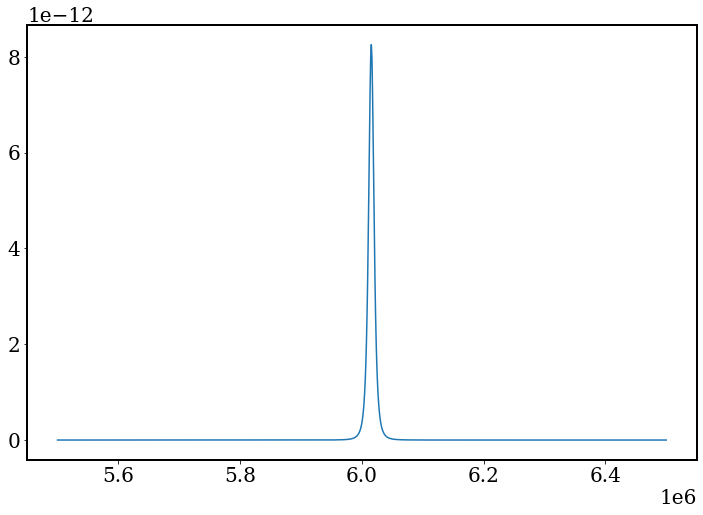

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 5.547e+08 (χ²/ndof = 695134.2)│              Nfcn = 183              │
│ EDM = 0.0381 (Goal: 0.0002)      │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│         INVALID Minimum          │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ ABOVE EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ Pa   │    0.0    │    0.1    │            │            │0.000817339│0.00165119│  yes  │
│ 1 │ P0   │703.73158e-6│0.00031e-6 │            │            │0.000352229│0.00140892│       │
│ 2 │ f0   │9.199473708401e6│0.000000000004e6│            │            │9.19944e+06│9.19954e+06│       │
│ 3 │ Lb   │ 30.61555  │  0.00008  │            │            │    1    │   40    │       │
│ 4 │ Rl   │   50.0    │    0.1    │            │            │         │         │  yes  │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬─────────────────────────────────────────────────────────────┐
│    │          Pa          P0          f0          Lb          Rl │
├────┼─────────────────────────────────────────────────────────────┤
│ Pa │           0           0           0        0e-9           0 │
│ P0 │           0    9.36e-20  -63.57e-18 1.07708e-15           0 │
│ f0 │           0  -63.57e-18    1.84e-11    0.016e-9           0 │
│ Lb │        0e-9 1.07708e-15    0.016e-9    5.89e-09        0e-9 │
│ Rl │           0           0           0        0e-9           0 │
└────┴─────────────────────────────────────────────────────────────┘

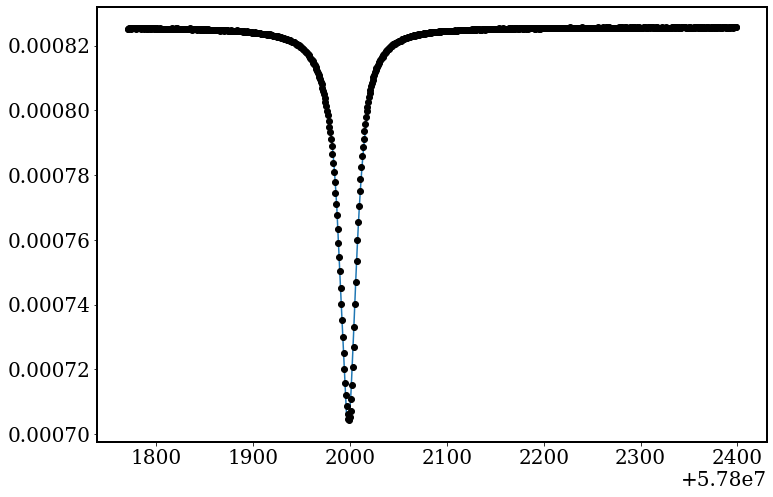

In [137]:
m1.migrad()

In [138]:
## parallel
r_P = m1.values['P0']/m1.values['Pa']
w0  = m1.values['f0']*2*np.pi
Rl  = m1.values['Rl']
Lb  = m1.values['Lb']
Rb  = (-Rl*r_P-Rl*r_P**0.5)/(r_P-1) 
Cb  = 1./(Lb*w0**2)

## series
#w0  = m1.values['f0']*2*np.pi
#Rl  = m1.values['Rl']
#Lb  = m1.values['Lb']
#Cb  = 1./(Lb*w0**2)
#Rb  = m1.values['Rb']

print('R = ', Rb, ' [Ohm]')
print('C = ', Cb*1e12, ' [pF]')
print('L = ', Lb, ' [H]')
Q = (1./Rb)  *  ((Lb/(Cb))**0.5)
print("Q unloaded = ", "{:e}".format(Q))

R =  601.477874839133  [Ohm]
C =  9.776247419156973e-06  [pF]
L =  30.615553391112936  [H]
Q =  2.942153e+06
